In [30]:
#Librerias
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('satgpa.csv')

In [32]:
df.head(10)

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,2,58,64,122,4.00,3.33
2,2,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63
5,2,55,56,111,4.00,2.91
6,1,57,65,122,2.80,2.83
7,1,53,62,115,3.80,2.51
8,2,67,77,144,4.00,3.82
9,1,41,44,85,2.60,2.54


In [33]:
#cambiar la variable sex a 0's y 1's 
df['sex'] = df['sex'].replace(2,0)

df.head(5)

,sex,sat_v,sat_m,sat_sum,hs_gpa,fy_gpa
0,1,65,62,127,3.40,3.18
1,0,58,64,122,4.00,3.33
2,0,56,60,116,3.75,3.25
3,1,42,53,95,3.75,2.42
4,1,55,52,107,4.00,2.63


In [34]:
x=df.copy()
x.drop(columns=['sat_v', 'sat_m', 'fy_gpa'], inplace=True)
X = np.hstack((
    np.ones(1000).reshape(1000, 1),
    x
))
print(x.shape)

(1000, 3)


In [35]:
# separar x y Y

y = np.array(df['fy_gpa']).reshape(len(x), 1)
print(y.shape)

(1000, 1)


In [36]:
m,n = X.shape
theta_0=np.random.rand(n,1)

In [37]:
# Estas ecuaciones las saqué de las clases que hemos tenido
def linear_cost(X, y, theta):
    h = X @ theta
    return ((h - y) ** 2).sum() / (2*len(X))

def linear_cost_gradient(X, y, theta):
    h = X @ theta
    return ((h - y).T @ X).T / (2*len(X))

def gradient_descent(
    X, y, theta_0, 
    cost_function, cost_function_gradient,
    learning_rate=0.01, 
    threshold=0.001,
    max_iter=1000
):
    theta = theta_0
    iteration = 0
    costs = []
    while np.linalg.norm(cost_function_gradient(X, y, theta)) > threshold and iteration < max_iter:
        iteration += 1
        theta -= learning_rate * cost_function_gradient(X, y, theta)
        costs.append(cost_function(X, y, theta))

    return theta, costs

In [38]:

r_theta, costs = gradient_descent(
    X, y, theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.00001,
    threshold=10
)

In [39]:
#  resultados
r_theta

array([[ 0.93747378],
       [ 0.21541874],
       [-0.00933844],
       [ 0.81517936]])

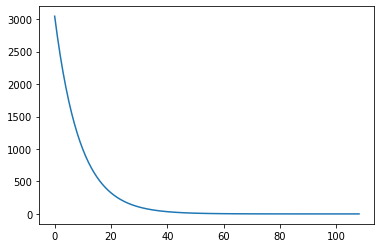

In [40]:
import matplotlib.pyplot as plt

plt.plot(costs)